# Basic Statistics Review – Linear Regression

Script for the 1-Introduction-to-R---Reviewing-Basic-Statistics.pdf

### Example 1 - Mauna Loa Atmospheric CO2 Concentration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
cols = ['year', 'month', 'date_1', 'date_2', 'CO2', 'seasonaly_adjusted', 'fit',
        'seasonally_adjusted_fit', 'CO2_filled', 'seasonally_adjusted_filled']

co2 = pd.read_csv('monthly_in_situ_co2_mlo.csv', header = 56, names = cols)

co2 = co2[['year', 'month', 'CO2']]

print(co2.shape)

co2.head()

(792, 3)


,year,month,CO2
0,1958,1,-99.99
1,1958,2,-99.99
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51


In [3]:
#remove -99.00 CO2 data

idx_to_remove = co2[co2.CO2 == -99.99].index

co2 = co2.drop(idx_to_remove)

co2.shape

(773, 3)

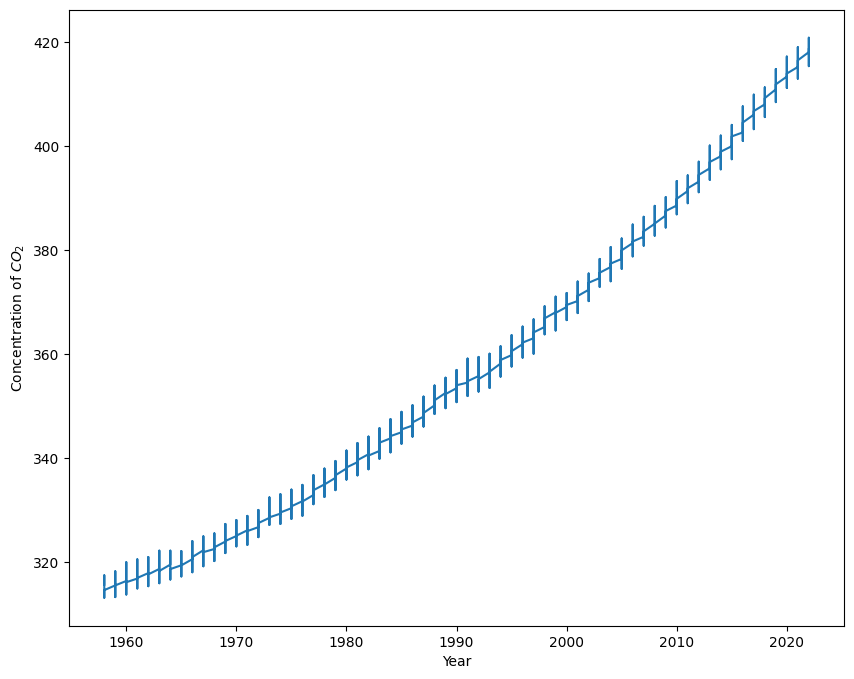

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.plot(co2.year, co2.CO2)
ax.set_xlabel('Year')
ax.set_ylabel('Concentration of $CO_2$')

plt.show()

In [5]:
# calculate the slope and intercept values “by hand” 

SSxx = sum((co2.year - stat.mean(co2.year)) * (co2.year - stat.mean(co2.year)))
print(SSxx)
SSxy = sum((co2.CO2 - stat.mean(co2.CO2)) * (co2.year - stat.mean(co2.year)))
print(SSxy)

print()
slope = (SSxy / SSxx )
print('Slope: {}'.format(slope))
intercept = stat.mean(co2.CO2) - slope*stat.mean(co2.year) 
print('Intercept: {}'.format(intercept))

268381.10219922324
433256.59443725756

Slope: 1.6143334641931861
Intercept: -2855.155524784057


In [6]:
# compute the residuals by hand

co2_fitted_values = slope*co2.year + intercept
co2_residuals = co2.CO2 - co2_fitted_values

#print(co2_fitted_values, co2_residuals)

In [7]:
# Using sklearn- Linear Regression

from sklearn.linear_model import LinearRegression

#X = co2[['year', 'month']].values
X = co2.year.values.reshape(-1, 1)
y = co2.CO2.values

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

print('Score: {}'.format(reg.score(X, y)))

print('Coef: {}'.format(reg.coef_[0]))

print('Intercept: {}'.format(reg.intercept_))

Score: 0.9770218741717583
Coef: 1.6143334641931848
Intercept: -2855.1555247840543


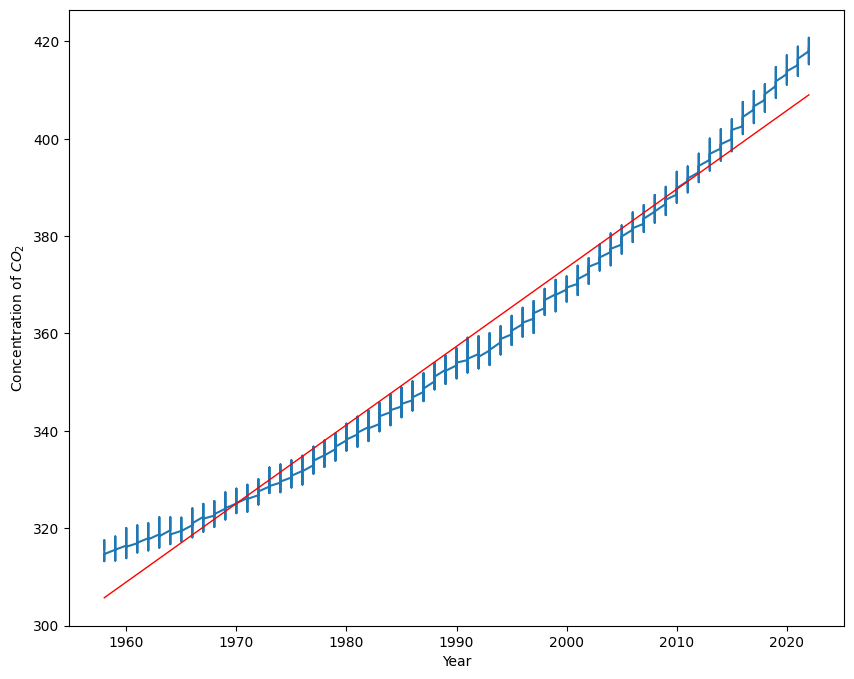

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.plot(co2.year, co2.CO2, label = 'Original data')
ax.plot(X, y_pred, color = 'red', linewidth = 1, label = 'Linear Regression data')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration of $CO_2$')

plt.show()

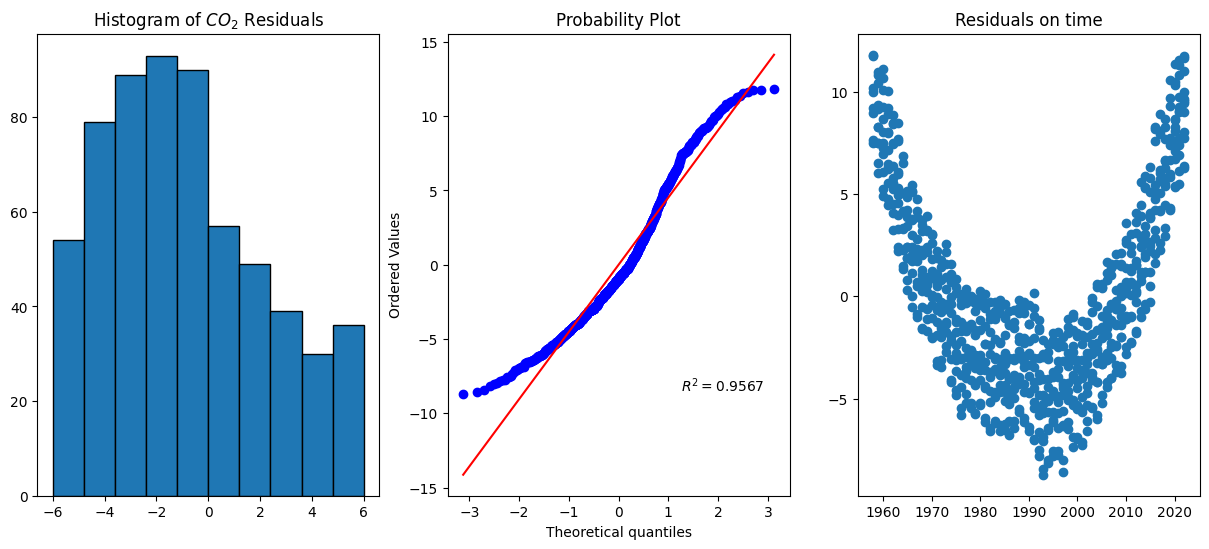

In [9]:
from scipy import stats

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15, 6))

## histogram of CO2 residuals
ax1.hist(co2_residuals, range = (-6, 6), edgecolor = 'black')
ax1.set_title('Histogram of $CO_2$ Residuals')

## normal probability plot
stats.probplot(co2_residuals, dist = 'norm', fit = True, rvalue = True, plot = ax2)

## plot residuals with time
ax3.scatter(co2.year, co2_residuals, marker = 'o')
ax3.set_title('Residuals on time')

plt.show()

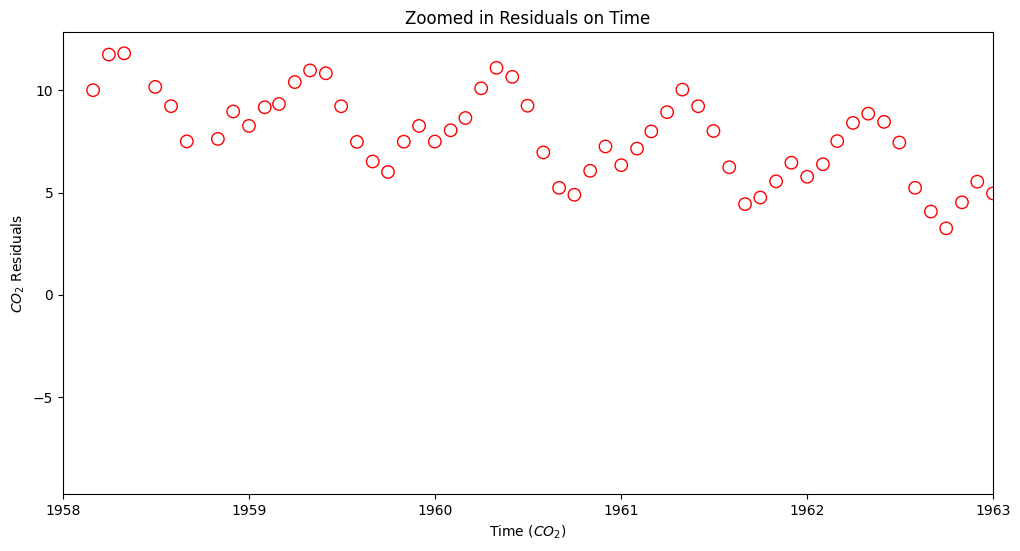

In [10]:
# zoom in on the residuals to see the seasonality in the data set.
import datetime

fig, ax = plt.subplots(1, 1, figsize = (12,6))

co2['date'] = pd.to_datetime(co2[['year', 'month']].assign(DAY=1))

ax.scatter(co2.date, co2_residuals, facecolors = 'none', edgecolors = 'r', s = 80)
ax.set_xlim([datetime.date(1958,1,1), datetime.date(1963,1,1)])

ax.set_title('Zoomed in Residuals on Time')
ax.set_ylabel('$CO_2$ Residuals')
ax.set_xlabel('Time ($CO_2$)')

plt.show()

### Example 2 - Sleep

A very famous data set was discussed in William Gossett’s (he’s better known as “Student”)
classic paper The Probable Error of a Mean (Student, 1908). Gossett describes an experiment in
which two sleeping aides are administered during the course of a clinical trial to a group of 10
research subjects. The average number of hours of sleep gained (called by the variable name
“extra”) under the use of each of the two drugs (indicated by the variable name “group”) are
recorded. 

Recorded for us is the extra sleep obtained as a consequence of taking the drug (“extra”), a label
telling us which drug was taken (“group”), and a label for which of the 10 people we are talking
about (“ID”).

In [11]:
sleep = pd.read_csv('sleep.csv')
sleep = sleep[['extra','group','ID']]

print(sleep.shape)

sleep.head()

(20, 3)


,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


In [18]:
sleep[sleep['group'] == 1]['extra'].describe()

count    10.00000
mean      0.75000
std       1.78901
min      -1.60000
25%      -0.17500
50%       0.35000
75%       1.70000
max       3.70000
Name: extra, dtype: float64

In [19]:
sleep[sleep['group'] == 2]['extra'].describe()

count    10.000000
mean      2.330000
std       2.002249
min      -0.100000
25%       0.875000
50%       1.750000
75%       4.150000
max       5.500000
Name: extra, dtype: float64

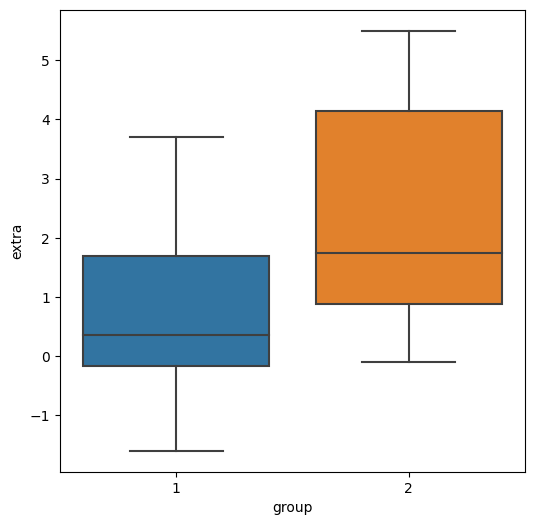

In [27]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

# plot boxplot to check the distribution for each group
ax = sns.boxplot(x = 'group', y = 'extra', data = sleep)

plt.show()

apparently the median seems to be higher in the second group

In [37]:
extra1 = sleep[sleep.group == 1].extra.values
extra2 = sleep[sleep.group == 2].extra.values

print(stats.shapiro(extra1))
print(stats.shapiro(extra2))

# t-test
# two dependent samples
print(stats.ttest_rel(extra1, extra2))

ShapiroResult(statistic=0.9258061051368713, pvalue=0.40792950987815857)
ShapiroResult(statistic=0.9192977547645569, pvalue=0.35113534331321716)
TtestResult(statistic=-4.062127683382037, pvalue=0.00283289019738427, df=9)


We have a fairly hefty t value (if that were a z value from a normal distribution, it would be quite quite large)
How large it is with a T distribution, depends on your sample size.

The p value we obtain is less than the standard nickel. Less than point zero five. 
It's even less than point zero one. These data are highly significant. 
So we are going to go with the Alternative hypothesis that the there is a difference between the two drugs.

Slope: 1.196319785403006
Intercept: -1.58
R: 0.8923046529182114


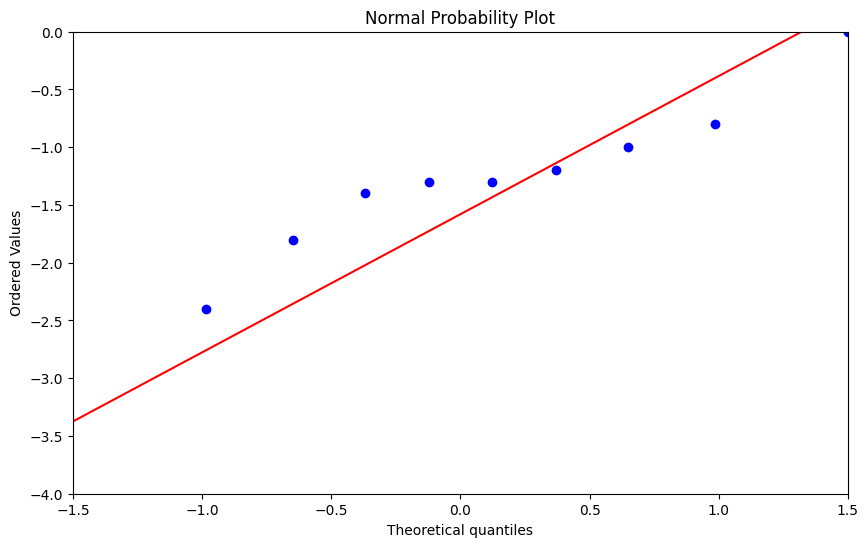

In [38]:
diffs = extra1 - extra2

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

probplt = stats.probplot(diffs, plot=plt, dist='norm')
qq_slope, qq_intercept, qq_r = probplt[1]
ax.set_title('Normal Probability Plot')
ax.set_ylim(-4, 0)
ax.set_xlim(-1.5, 1.5)

print('Slope:', qq_slope)
print('Intercept:', qq_intercept)
print('R:', qq_r)

plt.show()

# A Regression Model

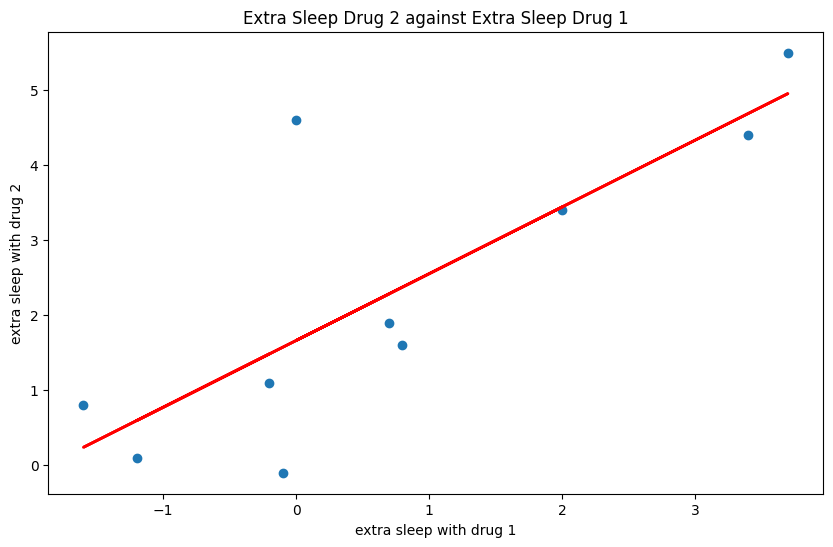

In [42]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.scatter(extra1, extra2)

sleep_linear_model = LinearRegression().fit(extra1.reshape(-1, 1), extra2.reshape(-1, 1))
sleep_linear_model_y_pred = sleep_linear_model.predict(extra1.reshape(-1, 1))

ax.plot(extra1, sleep_linear_model_y_pred, color='red', linewidth=2)
ax.set_title('Extra Sleep Drug 2 against Extra Sleep Drug 1')
ax.set_ylabel('extra sleep with drug 2')
ax.set_xlabel('extra sleep with drug 1')

plt.show()

In [43]:
print('Estimate a slope and an intercept:')
print('Slope:', sleep_linear_model.coef_[0][0] )
print('Intercept:', sleep_linear_model.intercept_[0])

Estimate a slope and an intercept:
Slope: 0.8899496615170976
Intercept: 1.6625377538621764


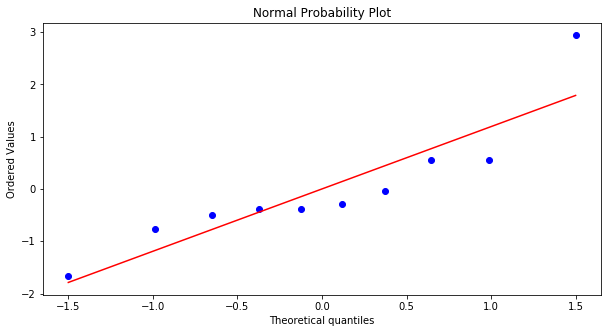

In [17]:
# QQ Plot

residuals = extra2.reshape(-1, 1) - sleep_linear_model_y_pred

probplt = stats.probplot(residuals.reshape(-1), plot=plt, dist="norm")
#qq_slope, qq_intercept, qq_r = probplt[1]
plt.title('Normal Probability Plot')
#plt.ylim(-1, 3)
#plt.xlim(-1.5, 1.5)

#print('QQ slope:', qq_slope)
#print('QQ intercept:', qq_intercept)
#print('QQ r:', qq_r)

plt.show()


In [44]:
# Statsmodels gives R-like statistical output
from statsmodels.api import OLS

OLS(extra2.reshape(-1, 1), extra1.reshape(-1, 1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              13.35
Date:                Tue, 24 Jan 2023   Prob (F-statistic):                     0.00529
Time:                        12:00:35   Log-Likelihood:                         -20.648
No. Observations:                  10   AIC:                                      43.30
Df Residuals:                       9   BIC:                                      43.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2521      0.343      3.654      0.005       0.477       2.027
==============================================================================
Omnibus:                        8.413   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.570
Skew:                           1.374   Prob(JB):                        0.168
Kurtosis:                       4.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our Model is the:

extra2 = 0.8899 x extra1 x 1.6625

## Questions:

1. What do you predict for sleep gained with drug 2 if you know the sleep gained with drug 1 is 2 hours?

In [50]:
sleep_linear_model.coef_[0][0]*2 + sleep_linear_model.intercept_[0]

3.442437076896372

2. What is the residual associated with the 3rd data point?

In [51]:
extra2[2] - (sleep_linear_model.coef_[0][0]*extra1[2] + sleep_linear_model.intercept_[0])

-0.3845478215587568